# Image Segmentation with $k$-Means

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

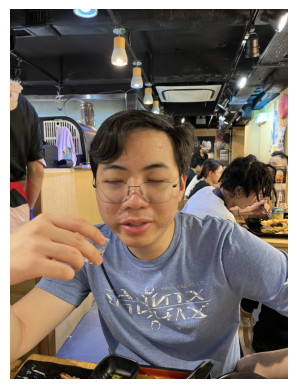

Shape: (4032, 3024, 3)


In [81]:
PATH = "./image.png"
image = cv2.cvtColor(cv2.imread(PATH), cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()

print("Shape:", image.shape)

In [82]:
# reshape image to 2D array (each row contains RGB values)
pixels = np.float32(image.reshape((-1, 3)))
print(pixels.shape)

(12192768, 3)


In [83]:
# define criteria for stopping the algorithm
# max_iter: maximum number of iterations
# epsilon: maximum distance between new centers and old centers
MAX_ITER = 100
EPSILON = 1.0
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, MAX_ITER, EPSILON)

In [84]:
# perform k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print("Centers:")
for c in centers:
    print("\t{}".format(c))
print("Shape of labels:", labels.shape)

Centers:
	[160.64241  113.521385  77.68253 ]
	[201.96263 204.47403 202.7368 ]
	[123.95619 130.87805 150.35416]
	[206.41232  164.21893  118.605125]
	[84.367226 80.258255 83.387146]
	[32.3592   29.54829  27.109636]
Shape of labels: (12192768, 1)


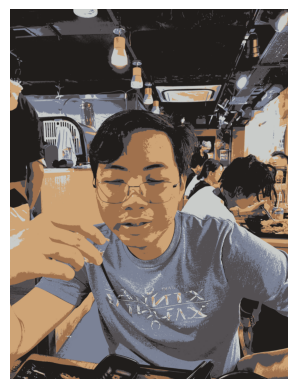

In [85]:
# get original image with labels
centers = np.uint8(centers)
segmented_image = centers[labels.ravel()].reshape((image.shape))

# show segmented image
plt.imshow(segmented_image)
plt.axis("off")
plt.show()

In [92]:
np.unique(labels.ravel())

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [106]:
centers

array([[160, 113,  77],
       [201, 204, 202],
       [123, 130, 150],
       [206, 164, 118],
       [ 84,  80,  83],
       [ 32,  29,  27]], dtype=uint8)

In [109]:
# append black color to centers
centers_new = np.append(centers, [[0, 0, 0]], axis = 0)

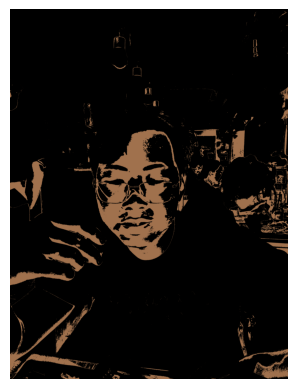

In [110]:
# black for background, color for object
sample_labels = labels.copy()
sample_labels[sample_labels != 0] = k
sample_image = centers_new[sample_labels.ravel()].reshape((image.shape))

plt.imshow(sample_image)
plt.axis("off")
plt.show()